In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.plotter import PhononBSPlotter
import numpy as np 
import matplotlib.pyplot as plt
from pymatgen.core.lattice import Lattice

with MPRester("7dRNB3pyHFTcJ6LC") as m:
    # Structure for material id
    structure = m.get_phonon_bandstructure_by_material_id("mp-2894") 

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



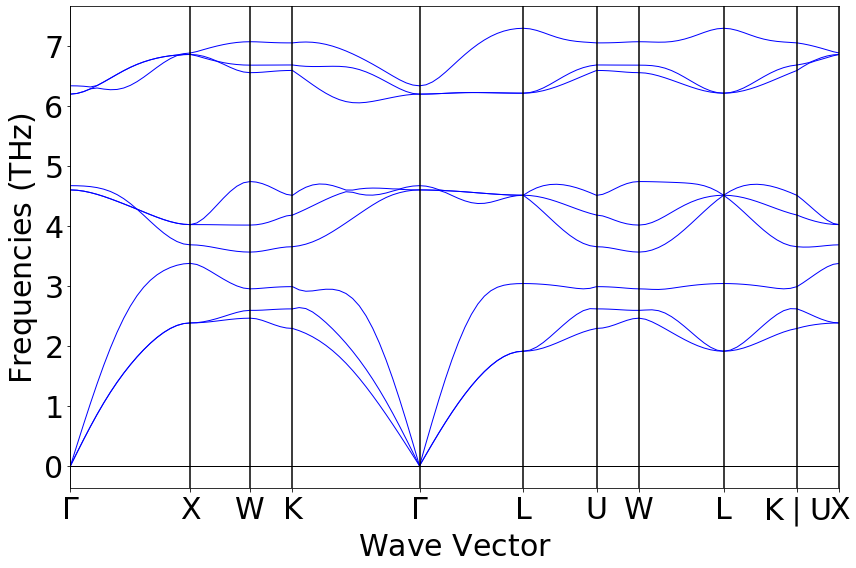

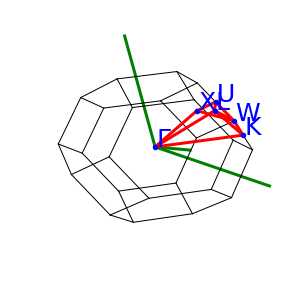

In [2]:
#Zone étudiée
info = PhononBSPlotter(structure)
info.get_plot()
info.plot_brillouin()


Calcul de la vitesse du son :

L'étude des modes de vibrations d'une chaine atomique permet de définir une relation entre fréquence w, vecteur d'onde q et la vitesse du son v lorsque la norme des vecteurs d'ondes tend vers zéro (proche du point Γ).  
Nous trouvons alors v = |dw/dq| = 2*pi*|df/dq|. Avec les données fournies par Materials Project, nous pouvons tracer une fonction linéaires de la fréquence en fonction du vecteur d'onde : f(q) = a*q + b.
La vitesse du son de la branche acoustique dans la direction Γ - X vaut : 2583.7843714392034  m/s et est représentée par la flèche rouge.
La vitesse du son de la branche acoustique dans la direction K - Γ vaut  2588.1281026661163  m/s et est représentée par la flèche verte.
La vitesse du son de la branche acoustique dans la direction Γ - L vaut  4491.927379059454  m/s et est représentée par la flèche orange.


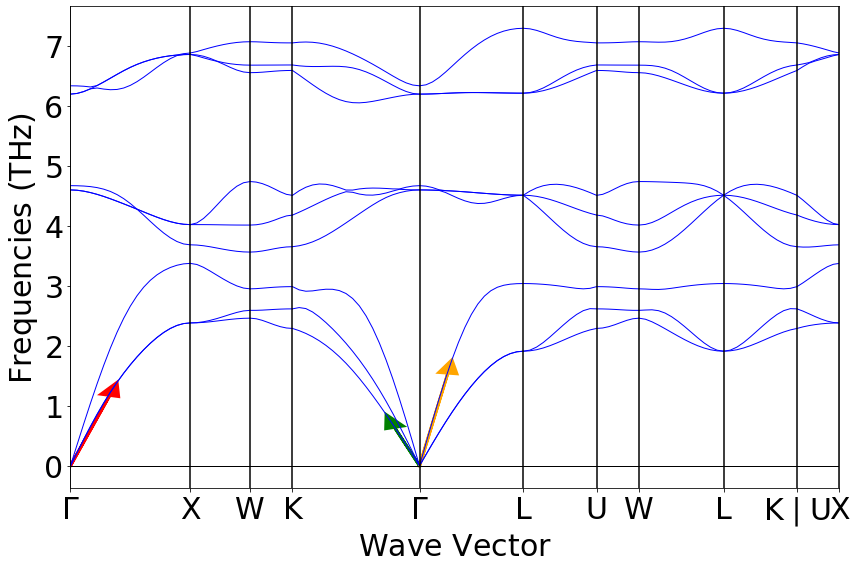

In [3]:
# Vitesse du son
print("Calcul de la vitesse du son :\n")
print("L'étude des modes de vibrations d'une chaine atomique permet de définir une relation entre fréquence w, vecteur d'onde q et la vitesse du son v lorsque la norme des vecteurs d'ondes tend vers zéro (proche du point Γ).  ")
print("Nous trouvons alors v = |dw/dq| = 2*pi*|df/dq|. Avec les données fournies par Materials Project, nous pouvons tracer une fonction linéaires de la fréquence en fonction du vecteur d'onde : f(q) = a*q + b.")

data = info.bs_plot_data()
distances = data.get("distances") #obtention des vecteurs d'onde q le long de tous les chemins
frequency = data.get("frequency") #obtention des fréquences associées aux vercteurs d'ondes q


v1 =2*np.pi*np.abs((frequency[0][0][1]-frequency[0][0][0])*(10**2)/(distances[0][1]-distances[0][0])) #changement d'unité et calcul de la vitesse du son
print("La vitesse du son de la branche acoustique dans la direction Γ - X vaut :",v1, " m/s et est représentée par la flèche rouge.")

v2 = 2*np.pi*np.abs((frequency[3][1][-2] - frequency[3][0][-1])*(10**2)/(distances[3][-2]-distances[3][-1])) #changement d'unité et calcul de la vitesse du son
print("La vitesse du son de la branche acoustique dans la direction K - Γ vaut ",v2, " m/s et est représentée par la flèche verte.")


v3 = 2*np.pi*np.abs((frequency[4][2][1]-frequency[4][2][0])*(10**2)/(distances[4][1]-distances[4][0])) #changement d'unité et calcul de la vitesse du son
print("La vitesse du son de la branche acoustique dans la direction Γ - L vaut ",v3, " m/s et est représentée par la flèche orange.")

#Représentation graphique 
info.get_plot()

#Pente Γ-X en mauve: 
plt.arrow(distances[0][0], frequency[0][1][0], distances[0][7]-distances[0][0], frequency[0][1][7]-frequency[0][1][0], head_width=0.15, linewidth=3, length_includes_head=True, color='red')
#Pente Γ-K en rouge: 
plt.arrow(distances[3][-1], frequency[3][0][-1], distances[3][14]-distances[3][-1], frequency[3][0][14]-frequency[3][0][-1], head_width=0.15, linewidth=3, length_includes_head=True, color='green')
#Pente Γ-L en vert: 
plt.arrow(distances[4][0], frequency[4][2][0], distances[4][5]-distances[4][0], frequency[4][2][5]-frequency[4][2][0], head_width=0.15, linewidth=3, length_includes_head=True, color='orange')
plt.show()




In [4]:
print("on remarque que les résultats obtenus sont cohérents. La plus grande pente a la vitesse la plus élevée en valeur absolue.")

on remarque que les résultats obtenus sont cohérents. La plus grande pente a la vitesse la plus élevée en valeur absolue.
